# Iguazio Time Series DB Usage

In [ ]:
import pandas as pd
import v3io_frames as v3f
import numpy as np
from datetime import datetime, timedelta

## Create a sample time-series dataset and write to the DB

In [1]:
# create v3io frames adapter (same one for kv/tsdb/obj/stream/sql)
client = v3f.Client()

# create random+cumsum time series with 3 metrics (high,low,close)
end = datetime.now().replace(minute=0, second=0, microsecond=0)
rng = pd.date_range(end=end, periods=60, freq='300s', tz='Israel')
df = pd.DataFrame(np.random.randn(len(rng), 3), index=rng, columns=['cpu','mem','disk'])
df = df.cumsum()
print(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2018-10-02 14:05:00+03:00 to 2018-10-02 19:00:00+03:00
Freq: 300S
Data columns (total 3 columns):
cpu     60 non-null float64
mem     60 non-null float64
disk    60 non-null float64
dtypes: float64(3)
memory usage: 1.9 KB
None                                 cpu       mem      disk
2018-10-02 14:05:00+03:00  0.933897 -0.916895 -1.207371
2018-10-02 14:10:00+03:00  0.876833 -1.964795  0.670975
2018-10-02 14:15:00+03:00  1.540077 -1.997942  0.918253
2018-10-02 14:20:00+03:00  0.101722 -0.948778  0.147619
2018-10-02 14:25:00+03:00  2.425123 -0.686299  0.036415


In [49]:
client.write(backend='tsdb', table='clustermon',dfs=df, labels={'node':'11'})

{'num_frames': 1, 'num_rows': 60}

## Reading from the TSDB

In [ ]:
dfs = []; key_list = []
for df in client.read(backend='tsdb', table='clustermon', step='10m', aggragators='avg,max,count',start="now-5h", end='now'):  # , filter="__name__=='cpu'"
    #print(df.labels)
    #df.index = df.index.tz_localize('Israel')
    dfs += [df]
    key_list += [(df.labels['node'], df.labels['__name__'], df.labels['Aggregator'])]

In [51]:
comb = pd.concat(dfs, keys=key_list, names=['node', 'metric','func'])
comb.columns = ['']
comb.unstack(level=['metric','func'])

\
metric                        high                       low                   
func                           avg       max count       avg       max count   
node Date                                                                      
11   2018-09-29 21:44:17 -1.477705 -0.739035   2.0  0.896848  1.277099   2.0   
     2018-09-29 21:54:17 -1.582295 -1.116608   2.0  0.460278  0.537020   2.0   
     2018-09-29 22:04:17 -1.847861 -1.543047   2.0 -0.561068 -0.393600   2.0   
     2018-09-29 22:14:17 -1.153288 -1.147944   2.0 -1.435780 -0.551891   2.0   
     2018-09-29 22:24:17 -2.994355 -2.196948   2.0 -1.813749 -1.175142   2.0   
     2018-09-29 22:34:17 -3.340669 -3.081341   2.0 -2.103707 -1.682563   2.0   
     2018-09-29 22:44:17 -2.042713 -1.982671   2.0 -2.219642 -2.163848   2.0   
     2018-09-29 22:54:17 -1.959080 -1.505773   2.0 -1.496473 -0.365911   2.0   
     2018-09-29 23:04:17 -1.016556 -0.907506   2.0 -0.229547 -0.078180   2.0   
     2018-09-29 23:14:17  1.090523  1.346521   2.0 -2.300728 -2.037302   2.0   
     2018-09-29 23:24:17  0.404178  0.449059   2.0 -4.563454 -4.095960   2.0   
     2018-09-29 23:34:17 -1.351067 -0.688478   2.0 -5.450044 -5.012864   2.0   
     2018-09-29 23:44:17 -1.244462 -0.569408   2.0 -4.122179 -3.719279   2.0   
     2018-09-29 23:54:17 -1.111861 -0.970525   2.0 -3.199483 -2.916697   2.0   
     2018-09-30 00:04:17 -0.596996 -0.356807   2.0 -3.374890 -3.048844   2.0   
     2018-09-30 00:14:17  0.164371  0.322530   2.0 -2.975351 -2.772099   2.0   
     2018-09-30 00:24:17  1.394435  1.722966   2.0 -5.000560 -3.755242   2.0   
     2018-09-30 00:34:17  2.815268  2.845040   2.0 -5.278948 -5.227248   2.0   
     2018-09-30 00:44:17  1.853097  1.854282   2.0 -5.050500 -4.878113   2.0   
     2018-09-30 00:54:17  0.654906  1.258009   2.0 -5.393068 -4.744838   2.0   
     2018-09-30 01:04:17  0.575960  0.995346   2.0 -6.098739 -5.545104   2.0   
     2018-09-30 01:14:17  1.565484  1.938605   2.0 -4.781674 -4.676875   2.0   
     2018-09-30 01:24:17 -1.136471 -0.945249   2.0 -6.484813 -6.143703   2.0   
     2018-09-30 01:34:17 -1.383439 -0.872658   2.0 -6.910115 -6.223143   2.0   
     2018-09-30 01:44:17 -1.929805 -0.624254   2.0 -7.282795 -7.194025   2.0   
     2018-09-30 01:54:17 -3.114681 -2.737228   2.0 -6.934316 -6.431206   2.0   

                                                    
metric                       close                  
func                           avg       max count  
node Date                                           
11   2018-09-29 21:44:17  2.188171  2.212375   2.0  
     2018-09-29 21:54:17  1.116329  1.288640   2.0  
     2018-09-29 22:04:17 -0.984575 -0.334985   2.0  
     2018-09-29 22:14:17 -2.951615 -2.175035   2.0  
     2018-09-29 22:24:17 -5.235545 -4.897679   2.0  
     2018-09-29 22:34:17 -6.527413 -5.574587   2.0  
     2018-09-29 22:44:17 -6.928804 -5.925800   2.0  
     2018-09-29 22:54:17 -6.050278 -5.728095   2.0  
     2018-09-29 23:04:17 -5.315916 -4.878538   2.0  
     2018-09-29 23:14:17 -5.716884 -5.057786   2.0  
     2018-09-29 23:24:17 -4.881752 -4.728078   2.0  
     2018-09-29 23:34:17 -4.305286 -3.190759   2.0  
     2018-09-29 23:44:17 -2.486222 -1.975777   2.0  
     2018-09-29 23:54:17 -0.310328  0.225623   2.0  
     2018-09-30 00:04:17  1.832145  2.204527   2.0  
     2018-09-30 00:14:17  1.985780  1.996321   2.0  
     2018-09-30 00:24:17  3.282094  3.824943   2.0  
     2018-09-30 00:34:17  4.232761  4.528897   2.0  
     2018-09-30 00:44:17  4.570316  5.160681   2.0  
     2018-09-30 00:54:17  5.416613  5.600179   2.0  
     2018-09-30 01:04:17  6.075697  6.092829   2.0  
     2018-09-30 01:14:17  7.369579  7.851801   2.0  
     2018-09-30 01:24:17  6.264717  6.327879   2.0  
     2018-09-30 01:34:17  7.090548  7.834331   2.0  
     2018-09-30 01:44:17  7.365278  7.535174   2.0  
     2018-09-30 01:54:17  8.381555  9.055512   2.0

## Plot

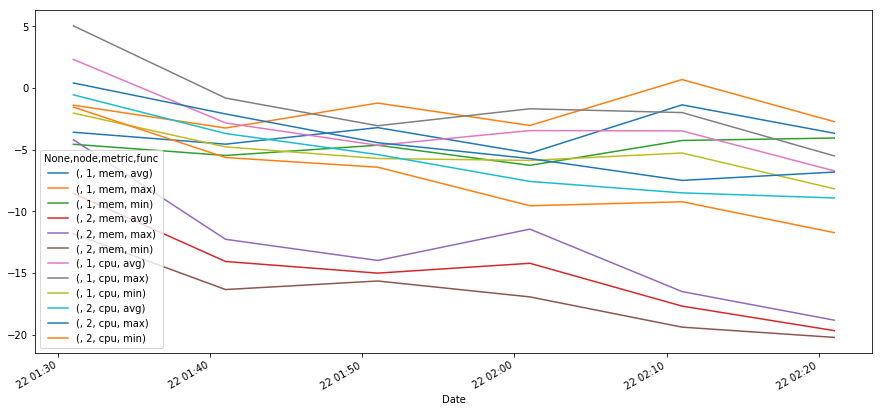

In [63]:
%matplotlib inline
comb.unstack(level=['node','metric','func']).plot(figsize=[15,7])